### 1) Sales Analaysis use line plots to track monthly sales and histogram for order qauntity distribution

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df_sales=pd.read_csv('datasets/Sales Data.csv')
df_sales

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [62]:
df_sales['Quantity Ordered'].unique()

array([1, 2, 4, 3, 7, 5, 6, 8, 9])

In [6]:
df_sales['Order Date']=pd.to_datetime(df_sales['Order Date'])

In [9]:
df_sales.isnull().sum()


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [11]:
Quantity_orderd=df_sales['Quantity Ordered']
Quantity_orderd

0         1
1         1
2         1
3         1
4         1
         ..
185945    1
185946    1
185947    1
185948    1
185949    1
Name: Quantity Ordered, Length: 185950, dtype: int64

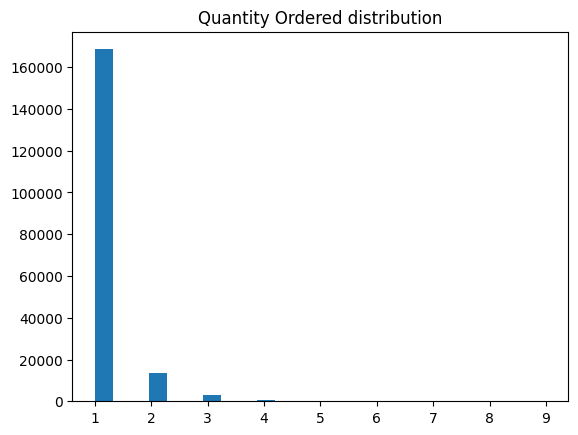

In [15]:
plt.hist(Quantity_orderd,bins=25)
plt.title('Quantity Ordered distribution')
plt.show()

In [38]:
months=df_sales['Month'].unique()
months

array([12,  1,  4,  5,  2,  3,  8,  9,  6, 11, 10,  7])

In [46]:
import numpy as np

In [71]:
sales=df_sales.groupby('Month')['Quantity Ordered'].sum()

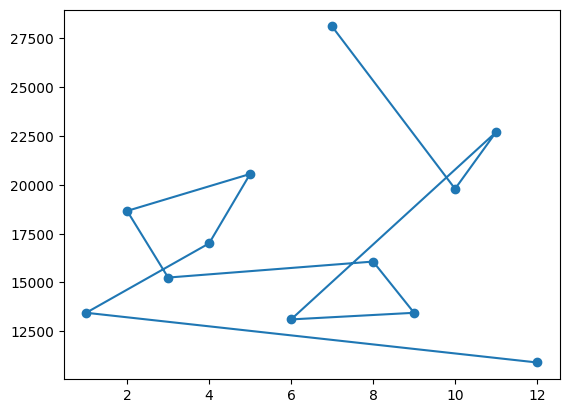

In [74]:
plt.plot(months,sales.values,marker='o')
plt.show()

## 2


In [81]:
df_cus=pd.read_csv('datasets/customer_segmentation_data.csv')

In [82]:
df_cus

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [83]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [85]:
import plotly.express as px

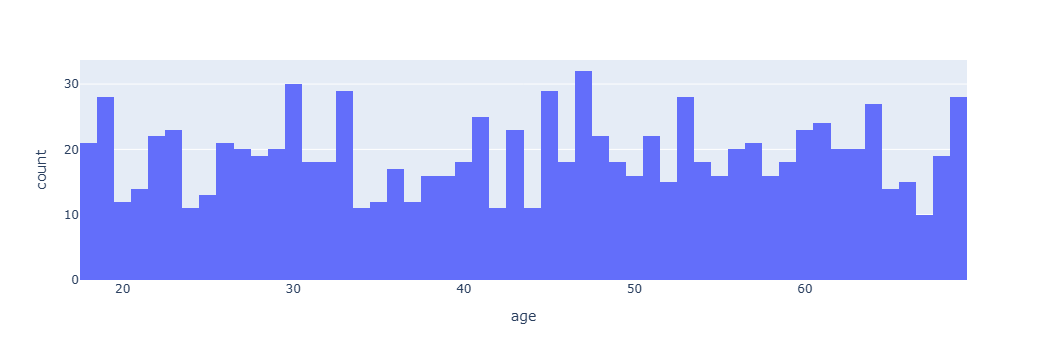

In [87]:
px.histogram(df_cus,'age',nbins=100)

In [96]:
gender_color_map = {'Male': '#1f77b4', 'Female': '#ff7f0e', 'Other': '#2ca02c'}  # Example colors
df_cus['gender_color'] = df_cus['gender'].map(gender_color_map)

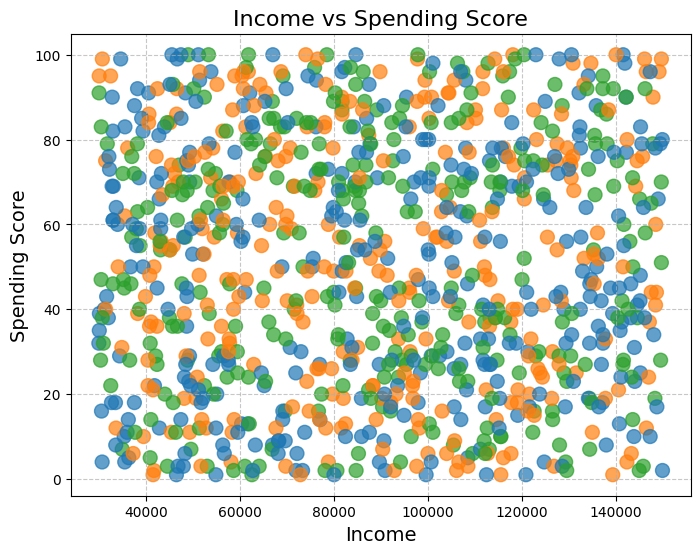

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cus['income'], df_cus['spending_score'], color=df_cus['gender_color'], s=100, alpha=0.7)
plt.title('Income vs Spending Score', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)

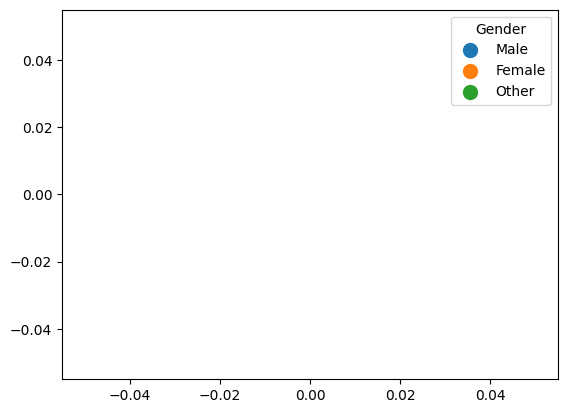

In [98]:
for gender, color in gender_color_map.items():
    plt.scatter([], [], color=color, label=gender, s=100)
plt.legend(title='Gender')